In [3]:
#mengimport library/package yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [6]:
#load dataset train dan test
data_train = pd.read_csv('C:\\Users\\Maulana Yusri Miladi\\Documents\\Python Scripts\\train.csv')
data_test = pd.read_csv('C:\\Users\\Maulana Yusri Miladi\\Documents\\Python Scripts\\test.csv')

In [7]:
print('Data train memiliki '+ str(len(data_train)) + ' baris dan memiliki '+ str(len(data_train.columns)) + ' kolom')
print('Data test memiliki '+ str(len(data_test)) + ' baris dan memiliki '+ str(len(data_test.columns)) + ' kolom')

Data train memiliki 891 baris dan memiliki 12 kolom
Data test memiliki 418 baris dan memiliki 11 kolom


In [8]:
print('3 kolom teratas dari data train :')
display(data_train.head(3))
print('3 kolom teratas dari data test :')
display(data_test.head(3))

3 kolom teratas dari data train :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


3 kolom teratas dari data test :


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


Pada kedua dataset diatas terlihat bahwa terdapat perbedaan 1 kolom yaitu kolom Survived yang mana kolom tersebut adalah kolom yang akan menjadi target prediksi kita. Dan pada kedua dataset diatas terdapat kolom yang memiliki nilai NULL/NaN. Oleh karena itu, perlu kita cek berapa banyak nilai NULL/NaN yang dimiliki oleh kedua dataset.

In [12]:
print('Missing data pada data train :',data_train.isnull().sum())
print('Missing data pada data test :',data_test.isnull().sum())

Missing data pada data train : PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing data pada data test : PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Pada train data memiliki nilai NULL/NaN pada kolom Age, Cavin dan Embarked, Sedangkan pada test data nilai NULL/NaN terdapat pada kolom Age, Fare dan Cabin.

In [15]:
#membuat fungsi untuk menggabungkan kedua dataset
def concat_df(data_train, data_test):
    return pd.concat([data_train, data_test], sort = True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [16]:
df_data = concat_df(data_train, data_test)

Exploratory Data Analysis

Exploratory Data Analysis adalah suatu proses dimana kita mengekstrak insight dari dataset, proses investigasi awal pada data untuk menemukan pola, untuk menemukan anomali dan untuk menguji hipotesis.

In [17]:
#Memeriksa nilai NULL/NaN pada kolom Age
print('Nilai NULL/NaN pada Kolom Age : ' + str(df_data['Age'].isnull().sum()))
print('Persentase nilai NULL/NaN : ' + str(round(df_data['Age'].isnull().sum()/len(df_data)*100,0)) + ' %')

Nilai NULL/NaN pada Kolom Age : 263
Persentase nilai NULL/NaN : 20.0 %


Sebesar 20% dari kolom Age adalah nilai NULL/NaN. Maka kita akan memeriksa distribusi pada kolom Age

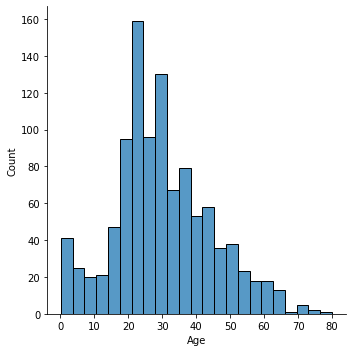

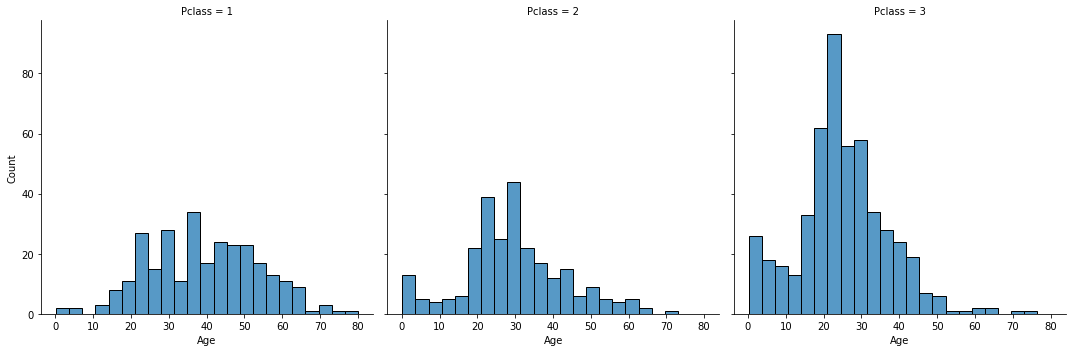

In [21]:
#Memeriksa distribusi pada kolom Age
sns.displot(df_data, x = 'Age')
sns.displot(df_data, x = 'Age', col = 'Pclass', multiple = 'dodge')

In [23]:
print('Median Age berdasarkan kolom PClass :')
display(data_train.groupby('Pclass')['Age'].median())
print('Median Age berdasarkan kolom PClass dan colom Sex :')
display(data_train.groupby(['Pclass','Sex'])['Age'].median())
print('Total Kasus:')
display(data_train.groupby(['Pclass','Sex'])['Age'].count())

Median Age berdasarkan kolom PClass :


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Median Age berdasarkan kolom PClass dan colom Sex :


Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Total Kasus:


Pclass  Sex   
1       female     85
        male      101
2       female     74
        male       99
3       female    102
        male      253
Name: Age, dtype: int64

Kita akan mengganti nilai NULL/NaN pada kolom Age dengan Median daripada harus menghapus semua baris yang bernilai NULL/NaN. Karena seperti yang terlihat pada grafik histogram yang memiliki kecenderungan miring ke kanan. 

In [24]:
#mengubah nilai NULL/NaN pada kolom Age dengan median
df_data['Age'] = df_data.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [25]:
#Memeriksa nilai NULL/NaN pada kolom Fare
df_data.loc[df_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


Pada kolom Fare kita hanya menemukan 1 data yang bernilai NULL/NaN. Mr. Thomas adalah penumpang kelas 3, berangkat sendiri dan berangkat dari Southhampton. Kita akan mencari data yang serupa dengan Mr. Thomas untuk mengisi nilai NULL/NaN pada kolom Fare.

In [26]:
mr_thomas = df_data.loc[(df_data['Pclass'] == 3) & (df_data['SibSp'] == 0) & (df_data['Embarked'] == 'S')]['Fare'].median()
print(mr_thomas)
df_data.loc[df_data['Fare'].isnull(), 'Fare'] = mr_thomas

7.925


In [28]:
#memeriksa kolom Cabin
display(data_train['Cabin'].unique())
print('Terdapat ' + str(data_train['Cabin'].nunique()) + ' Cabin yang berbeda dan ' + str(data_train['Cabin'].isnull().sum()) + ' nilai NULL/NaN.')

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Terdapat 147 Cabin yang berbeda dan 687 nilai NULL/NaN.


Ada banyak nilai yang hilang tetapi kita harus menggunakan variabel Cabin karena dapat menjadi prediktor penting. Seperti yang Anda lihat pada gambar berikut, kelas pertama memiliki Cabin di dek A, B atau C, campurannya ada di D atau E dan kelas ketiga terutama di f atau g. Kita dapat mengidentifikasi dek dengan huruf pertama.

In [30]:
#Mengelompokan Cabin berdasarkan huruf awal dan untuk data yang bernilai NULL/NaN akan dikelompokan kedalam M
df_data['Deck'] = df_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_all_deck = df_data.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

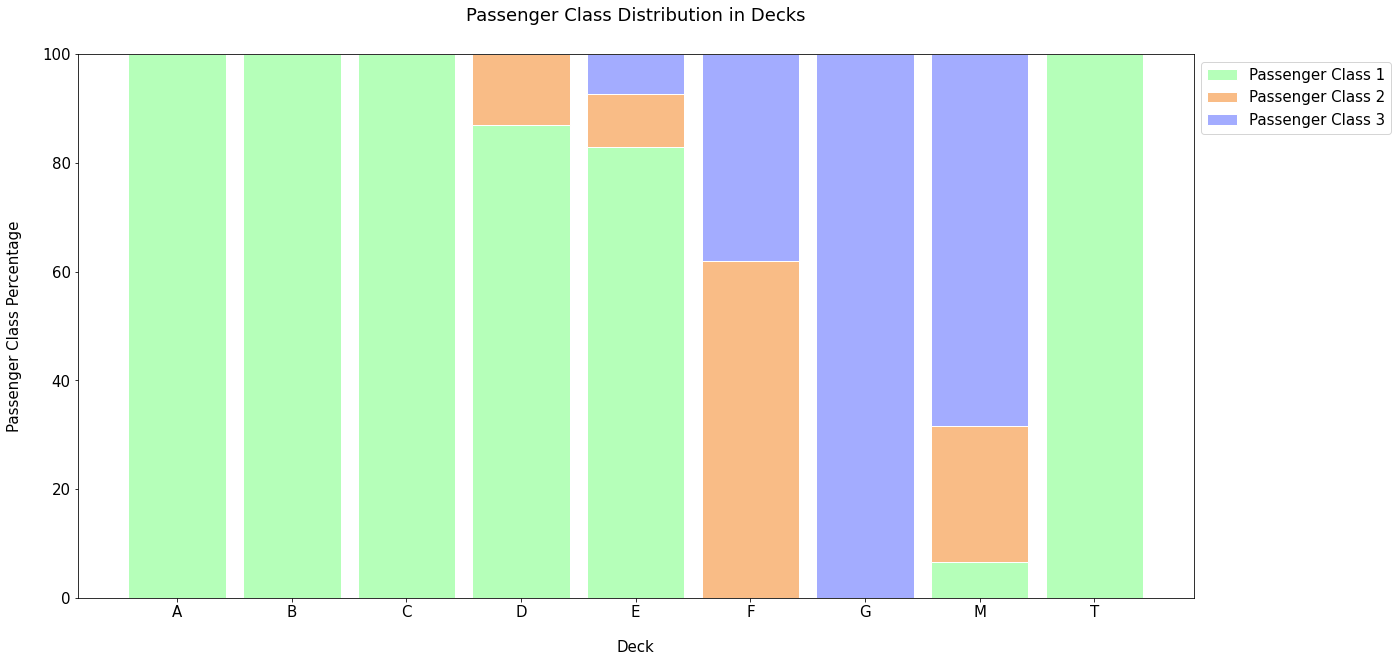

In [31]:
#fungsi untuk membuat bar plot Deck berdasarkan Pclass penumpang
def get_pclass_dist(df):
    
    # Pivot for each deck by class
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_deck)
display_pclass_dist(all_deck_per)

Text(0.5, 0.98, 'Survival rates for different cabines')

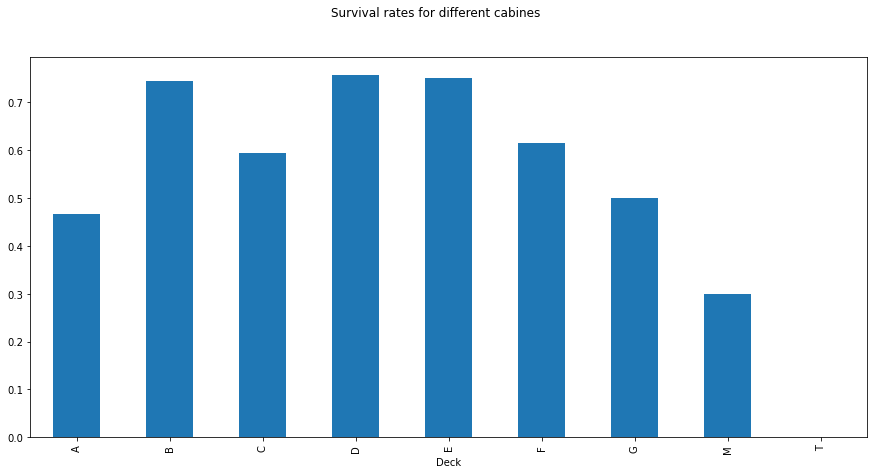

In [32]:
df_data[['Deck','Survived']].groupby('Deck')['Survived'].mean().plot(kind='bar', figsize=(15,7))
plt.suptitle('Survival rates for different cabines')

In [33]:
idx = df_data[df_data['Deck']=='T'].index
df_data.loc[idx, 'Deck'] = 'A'
df_data['Deck'] = df_data['Deck'].replace(['A','B','C'], 'ABC')
df_data['Deck'] = df_data['Deck'].replace(['D','E'], 'DE')
df_data['Deck'] = df_data['Deck'].replace(['F','G'], 'FG')

df_data['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [34]:
#memeriksa nilai NULL/NaN pada kolom Embarked
df_data.loc[df_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,ABC
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,ABC


Mengganti nilai NULL/NaN pada kolom Embarked dengan mencari data yang mirip Fare, Deck dan Class variabel bisa dijadikan sebagai acuan untuk mencari mengganti nilai NULL/NaN.

In [36]:
df_data.loc[(df_data['Pclass'] == 1) & (df_data['Fare']<= 80) & (df_data['Deck'] =='ABC')]['Embarked'].value_counts()

S    52
C    42
Name: Embarked, dtype: int64

In [37]:
df_data.loc[df_data['Embarked'].isnull(), 'Embarked'] = 'S'

Kesimpulan

Kita telah mengisi setiap nilai yang hilang dalam dataset dan tidak ada kolom yang dihapus. Kita juga menggunakan metode statistik untuk Age dan Fare, membuat kategori baru untuk Cabin dan melakukan beberapa penelitian untuk orang hilang pada Embarked. Mari kita periksa apakah semuanya baik-baik saja sekarang.

In [38]:
print('Data yang bernilai NULL/NaN :')
display(df_data.isnull().sum())

Data yang bernilai NULL/NaN :


Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Deck              0
dtype: int64

Feature Engineering

Feature Engineering adalah seni dan salah satu hal paling menarik di bidang Machine Learning. Kumpulan data titanic menawarkan banyak kemungkinan untuk mencoba berbagai metode dan meningkatkan skor prediksi.
Teknik yang akan gunakan sejauh ini:
- Binning variabel kontinu (misalnya Usia)
- Buat fitur baru dari variabel yang ada (mis. Title)
- Label encoding untuk fitur non numerik (misalnya Sex)
- One Hot Encoding untuk fitur kategori (misalnya Pclass)